In [239]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [240]:
# Helper function to plot the datasets
def plot_datasets(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=40)
    plt.title(title)
    plt.show()

In [241]:
def save_dataset_to_csv(X, y, filename):
    # Combine the features (X) and labels (y) into one array
    data = np.hstack((X, y.reshape(-1, 1)))  # Reshape y to be a column vector and concatenate it with X

    # Generate dynamic header based on the number of features in X
    num_features = X.shape[1]  # Number of features
    header = ','.join([f'feature{i+1}' for i in range(num_features)]) + ',label'

    # Save the array to a CSV file with the dynamic header
    np.savetxt(filename, data, delimiter=',', header=header, comments='')

In [242]:
N = 800
theta = np.sqrt(np.random.rand(N))*2*np.pi # np.linspace(0,2*pi,100)

r_a = 2*theta + np.pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - np.pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)


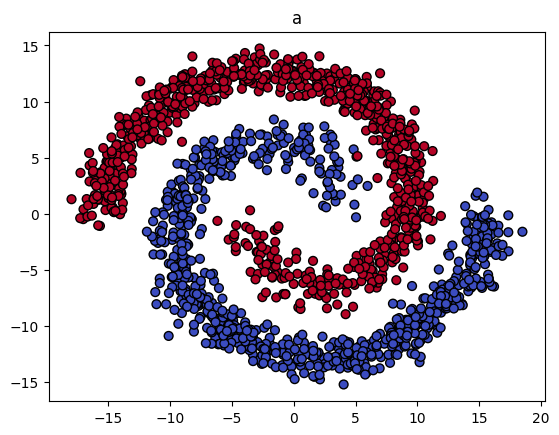

In [243]:
x_spiral = res[:,:2]
y_spiral = res[:,2]
plot_datasets(x_spiral, y_spiral, "a")

In [244]:
y_extended = y_spiral.astype(int)
y_circle_mapped = np.where(y_extended == 0, 'Class 0', 'Class 1')

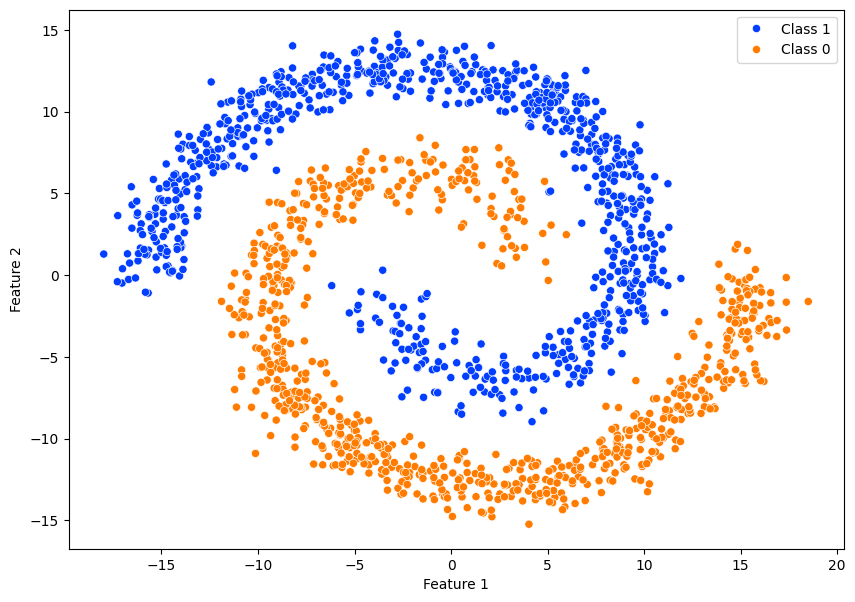

In [245]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_spiral[:, 0], y=x_spiral[:, 1], hue=y_circle_mapped, s=35, palette='bright')
#plt.title("t-SNE plot of the Irrelevant dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.savefig("plots/spiral_tsne.pdf")
plt.show()

In [246]:
save_dataset_to_csv(x_spiral, y_spiral, 'data/spiral_dataset.csv')

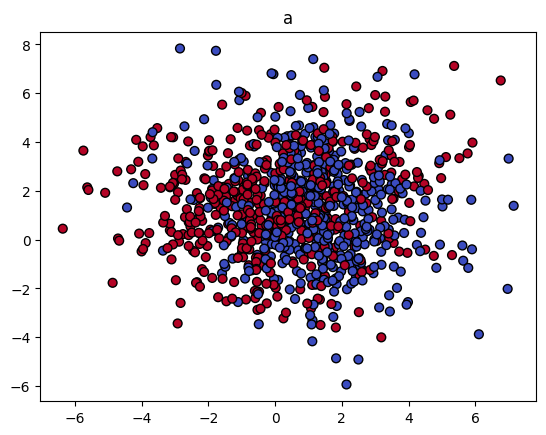

In [247]:
x_make, y_make = make_classification(n_samples=1000, n_classes=2, n_features=15, class_sep=1.3, n_redundant=2, n_informative=12)
plot_datasets(x_make, y_make, "a")

In [248]:
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_make)
y_extended = y_make.astype(int)
y_circle_mapped = np.where(y_extended == 0, 'Class 0', 'Class 1')

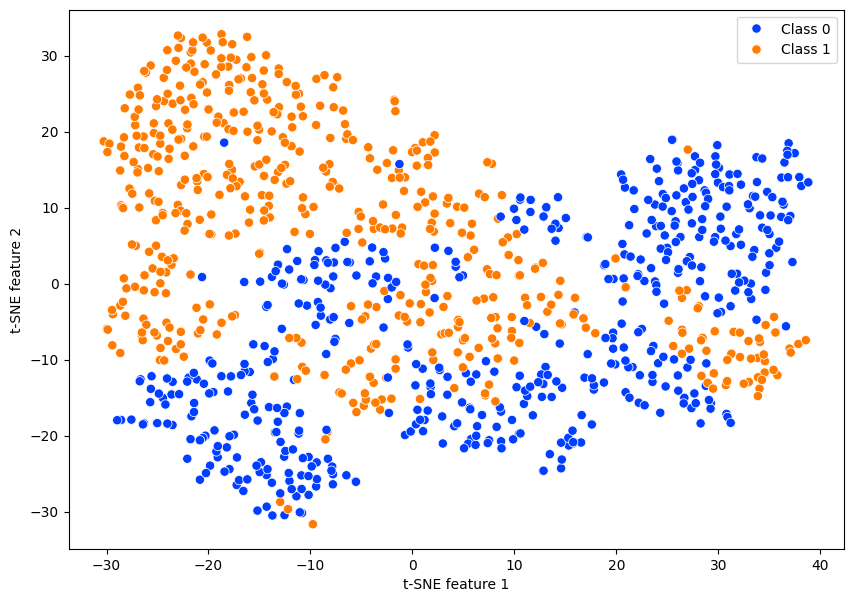

In [249]:
# Plotting
# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_tsne[:, 0], y=x_tsne[:, 1], hue=y_circle_mapped, s=45, palette='bright')
#plt.title("t-SNE plot of the Irrelevant dataset")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.savefig("plots/easy_tsne.pdf")
plt.show()

In [250]:
save_dataset_to_csv(x_make, y_make, 'data/easy_dataset.csv')

In [251]:
x_irre, y_irre = make_classification(n_samples=700, n_classes=2, n_features=15, class_sep=1, n_redundant=1, n_informative=2)
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_irre)
y_extended = y_irre.astype(int)
y_circle_mapped = np.where(y_extended == 0, 'Class 0', 'Class 1')

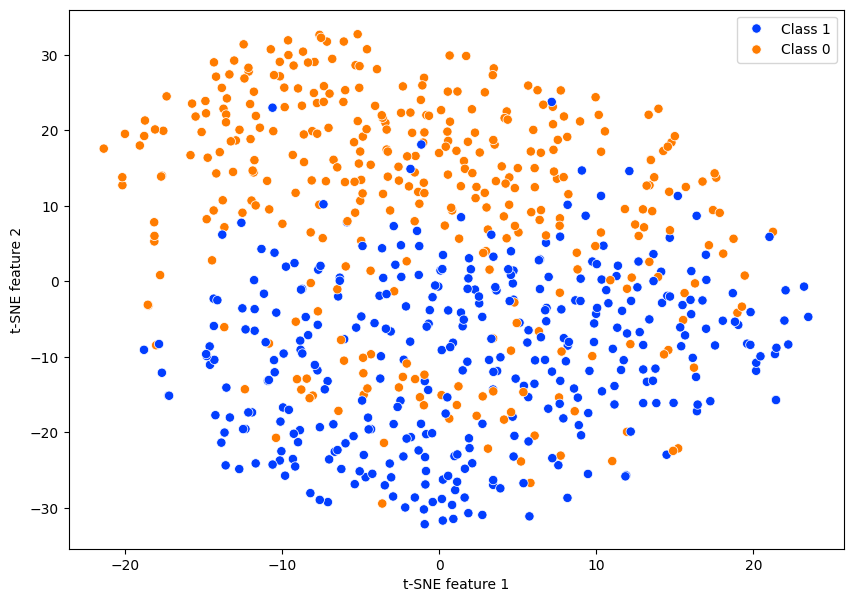

In [252]:
# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_tsne[:, 0], y=x_tsne[:, 1], hue=y_circle_mapped, s=45, palette='bright')
#plt.title("t-SNE plot of the Irrelevant dataset")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.savefig("plots/irrelevant_tsne.pdf")
plt.show()

In [253]:
save_dataset_to_csv(x_irre, y_irre, 'data/irrelevant_dataset.csv')

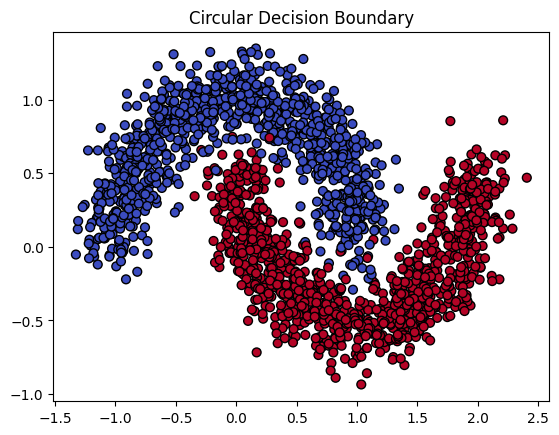

In [264]:
# 3. Circular Decision Boundary
X_moon, y_moon = make_moons(n_samples=2000, noise=0.15)
plot_datasets(X_moon, y_moon, "Circular Decision Boundary")

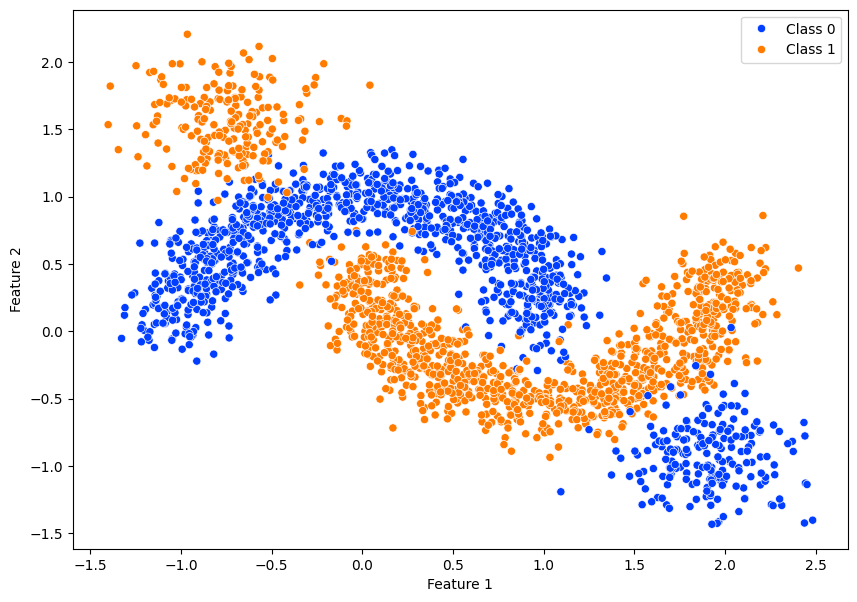

In [271]:
# Find the general region of the data
n_points = 200
x_min, x_max = X_moon[:, 0].min(), X_moon[:, 0].max()
y_min, y_max = X_moon[:, 1].min(), X_moon[:, 1].max()

# Cluster for class 0 (far away but closely packed)
np.random.seed(42)
cluster_0 = np.random.normal(loc=[x_max - 0.5, y_min ], scale=0.25, size=(n_points, 2))  # 15 points for class 0
y_cluster_0 = np.zeros(n_points)

# Cluster for class 1 (far away but closely packed)
cluster_1 = np.random.normal(loc=[x_min + 0.6, y_max + 0.2], scale=0.25, size=(n_points, 2))  # 15 points for class 1
y_cluster_1 = np.ones(n_points)

# Step 3: Combine the datasets
X_extended = np.vstack([X_moon, cluster_0, cluster_1])
y_extended = np.hstack([y_moon, y_cluster_0, y_cluster_1])

y_extended = y_extended.astype(int)
y_circle_mapped = np.where(y_extended == 0, 'Class 0', 'Class 1')
# Step 4: Plot the new dataset
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_extended[:, 0], y=X_extended[:, 1], hue=y_circle_mapped, palette="bright", s=35)
#plt.title("Valid Outlier dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.savefig("plots/valid_tsne.pdf")
plt.show()

In [256]:
#save_dataset_to_csv(X_extended, y_extended, 'data/outlier_dataset.csv')

In [257]:
def generate_circular_data(n_samples, p, radius_0=5, radius_1=1, noise=0.1):
    # Step 1: Generate data for class 0 (outer circle)
    X_class_0 = np.random.randn(n_samples // 2, p)  # Generate points from normal distribution
    X_class_0 = X_class_0 / np.sqrt(np.sum(X_class_0**2, axis=1))[:, np.newaxis]  # Normalize to unit sphere
    X_class_0 = X_class_0 * np.sqrt(radius_0)  # Scale to radius_0 (5)
    X_class_0 += np.random.normal(scale=noise, size=X_class_0.shape)  # Add noise
    y_class_0 = np.zeros(n_samples // 2)

    # Step 2: Generate data for class 1 (inner circle)
    X_class_1 = np.random.randn(n_samples // 2, p)  # Generate points from normal distribution
    X_class_1 = X_class_1 / np.sqrt(np.sum(X_class_1**2, axis=1))[:, np.newaxis]  # Normalize to unit sphere
    X_class_1 = X_class_1 * np.sqrt(radius_1)  # Scale to radius_1 (1)
    X_class_1 += np.random.normal(scale=noise, size=X_class_1.shape)  # Add noise
    y_class_1 = np.ones(n_samples // 2)

    # Step 3: Combine class 0 and class 1 data
    X = np.vstack([X_class_0, X_class_1])
    y = np.hstack([y_class_0, y_class_1])

    return X, y

In [258]:
# Example usage:
p = 10  # Number of dimensions
n_samples = 6000  # Total number of samples
X_circle, y_circle = generate_circular_data(n_samples, p, radius_0=1, radius_1=3, noise=0.35)


In [259]:
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(X_circle)

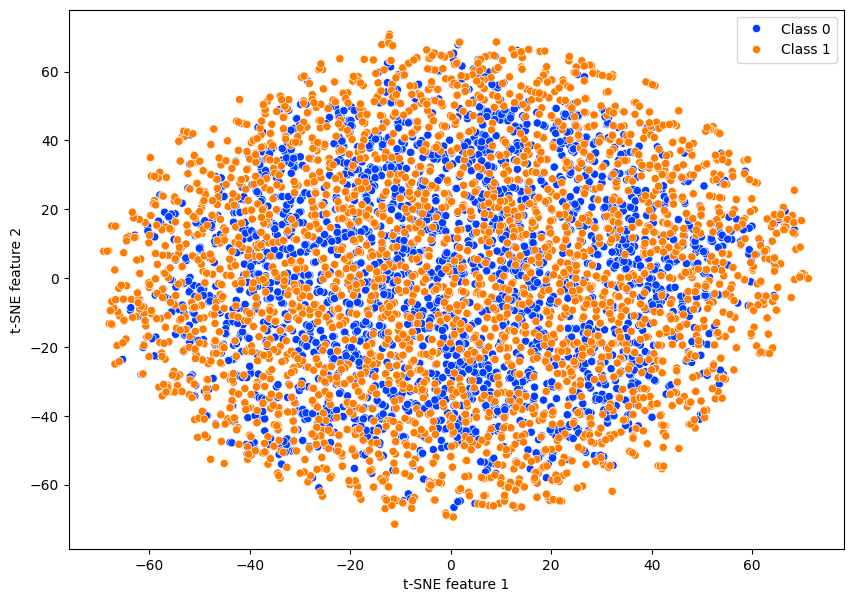

In [260]:
y_circle = y_circle.astype(int)
y_circle_mapped = np.where(y_circle == 0, 'Class 0', 'Class 1')
# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_tsne[:, 0], y=x_tsne[:, 1], hue=y_circle_mapped, s=35, palette='bright')
#plt.title("t-SNE plot of the Circle dataset")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.savefig("plots/circle_tsne.pdf")
plt.show()

In [261]:
#save_dataset_to_csv(X_circle, y_circle, 'data/circle_dataset.csv')